In [1]:
# Importing the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# importing the dataset

In [7]:
conc = pd.read_csv(r"D:\Data science\Assignments docs\Neural Networks\concrete.csv")
conc.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [6]:
conc.shape

(1030, 9)

In [5]:
conc.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Exploratory data analysis

In [9]:
conc.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

#### There are NA values in the dataset

### Univariate analysis

In [10]:
# PLotting histograms to check the distribution of data

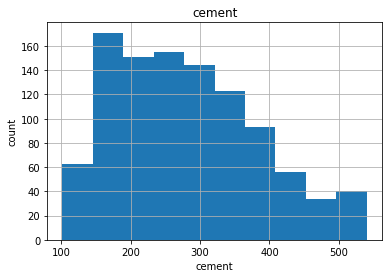

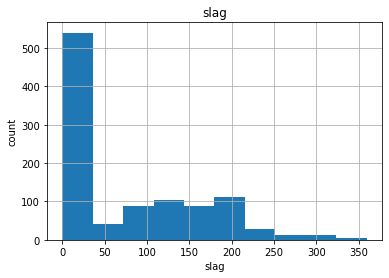

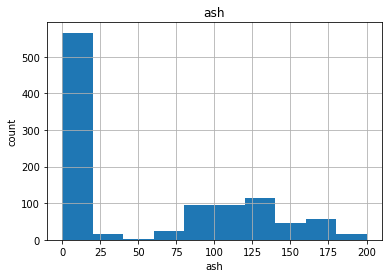

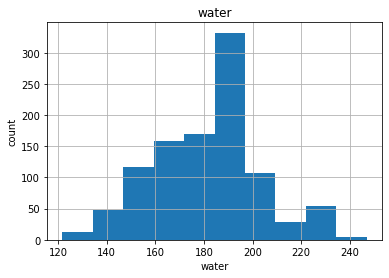

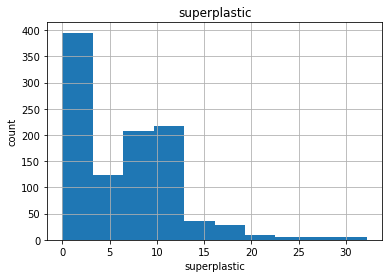

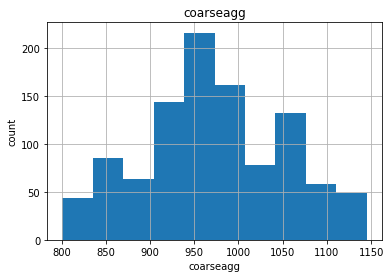

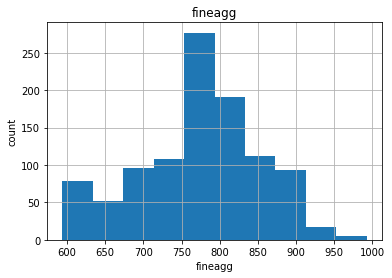

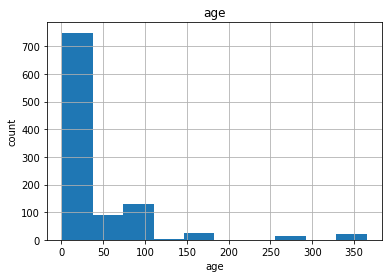

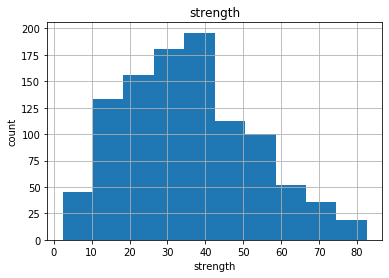

In [11]:
for feature in conc.columns:
    data = conc.copy()
    data[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

#### Only few of the columns are normally distributed

In [12]:
# PLotting boxplots to check the outliers if any

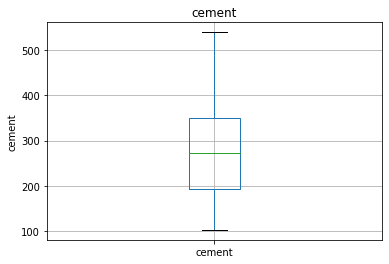

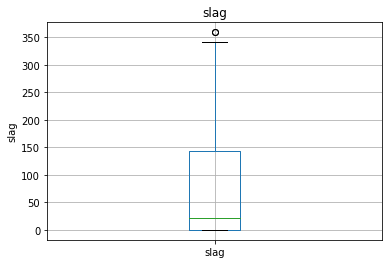

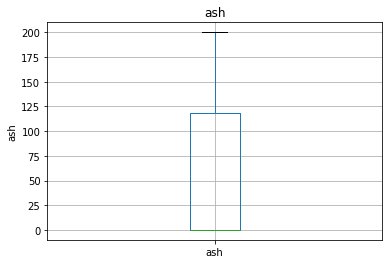

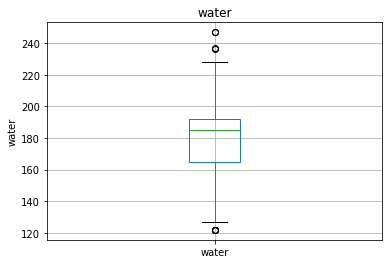

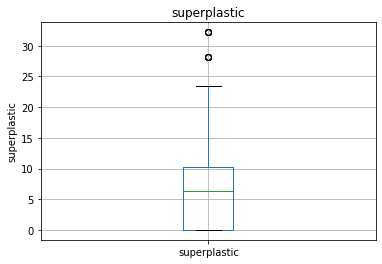

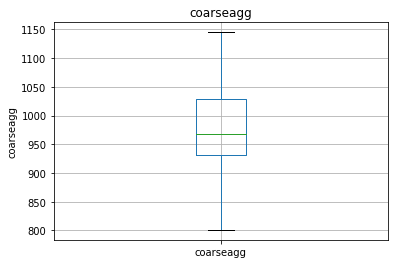

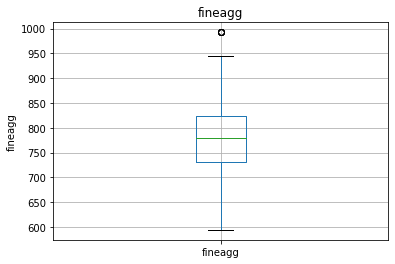

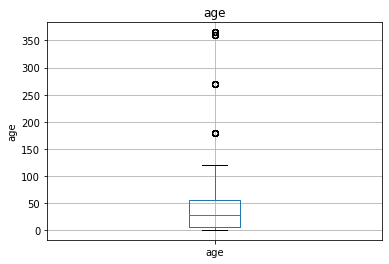

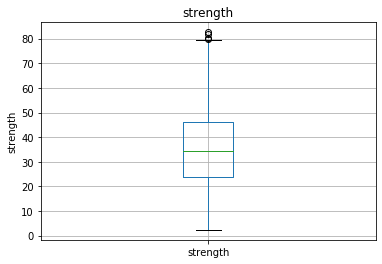

In [14]:
for feature in conc.columns:
    data = conc.copy()
    conc.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

#### Some of the variables have few outliers and other variables dont have any outliers

### Bi-variate analysis

In [16]:
# Scatter plots input variables with output variable

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


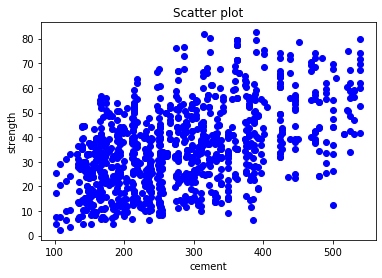

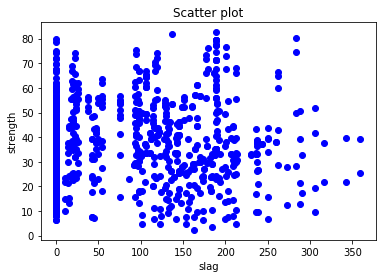

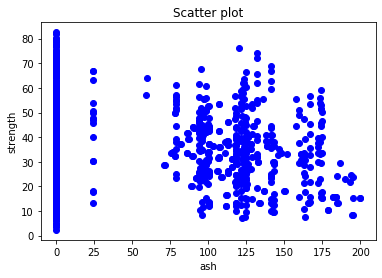

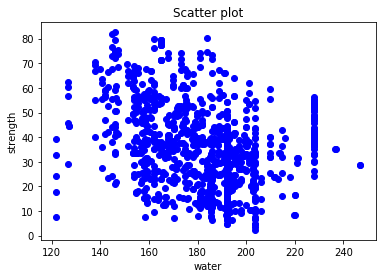

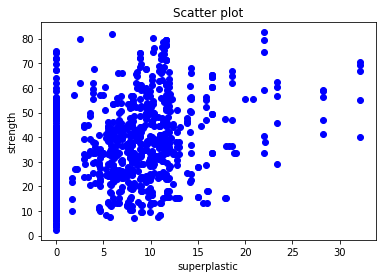

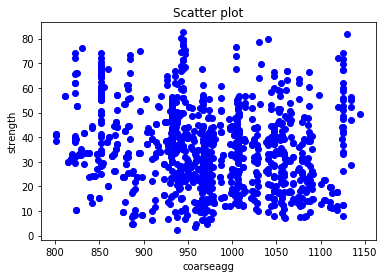

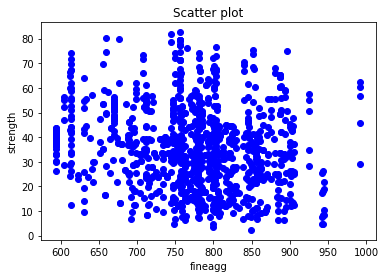

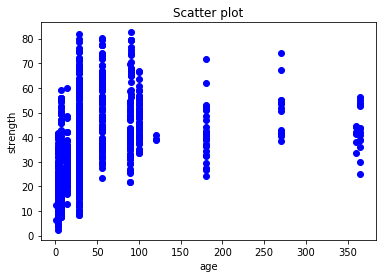

In [17]:
for feature in conc.columns:
    if feature != "strength":
        data = conc.copy()
        plt.plot(data[feature], data['strength'], "bo")
        plt.xlabel(feature)
        plt.ylabel('strength')
        plt.title("Scatter plot")
        plt.show()

#### The variation of output variable with many input variables was insignificant 

### Correlation matrix

In [18]:
conc.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


#### There are no input variables with higher correlation between each other

In [19]:
# Seperating input and output variables

In [20]:
X = conc.drop(columns = "strength", axis=1)
Y = conc["strength"]

In [21]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [22]:
Y.head()

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

## Feature scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(X)

StandardScaler()

In [28]:
X = scaler.transform(X)

In [23]:
# Splitting the data into train and test

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

## Model building

In [33]:
from sklearn.neural_network import MLPRegressor

In [34]:
mlp = MLPRegressor(hidden_layer_sizes=(50,30), random_state = 1, max_iter = 100)

In [35]:
mlp.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=100, random_state=1)

In [36]:
# Predicted values

In [37]:
pred_train = mlp.predict(x_train)
pred_test = mlp.predict(x_test)

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


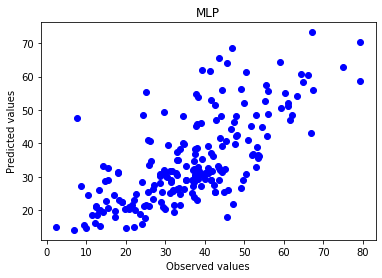

In [41]:
# plot predicted data 
plt.plot(y_test,pred_test,"bo")  
plt.title('MLP') 
plt.xlabel('Observed values') 
plt.ylabel('Predicted values') 
plt.show()

In [42]:
# RMSE values

In [44]:
from sklearn import metrics

In [45]:
print('RMSE of training data:', np.sqrt(metrics.mean_squared_error(y_train,pred_train)))

RMSE of training data: 11.450665319667571


In [46]:
print('RMSE of training data:', np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

RMSE of training data: 10.978873135312972


#### RMSE values for both train and test are similar and also RMSE values are low

## Hyper parameter tuning to improve accuracy

In [92]:
mlp = MLPRegressor(hidden_layer_sizes=(60,30,10), random_state = 1, max_iter = 500, learning_rate="adaptive")

In [93]:
mlp.fit(x_train,y_train)

MLPRegressor(hidden_layer_sizes=(60, 30, 10), learning_rate='adaptive',
             max_iter=500, random_state=1)

In [94]:
# Predicted values

In [95]:
pred_train = mlp.predict(x_train)
pred_test = mlp.predict(x_test)

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


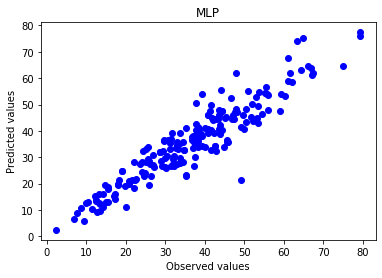

In [96]:
# plot predicted data 
plt.plot(y_test,pred_test,"bo")  
plt.title('MLP') 
plt.xlabel('Observed values') 
plt.ylabel('Predicted values') 
plt.show()

In [97]:
# RMSE values

In [98]:
from sklearn import metrics

In [99]:
print('RMSE of training data:', np.sqrt(metrics.mean_squared_error(y_train,pred_train)))

RMSE of training data: 4.405845075975189


In [100]:
print('RMSE of training data:', np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

RMSE of training data: 5.365594606452362


#### After hyper parameter tuning the least RMSE obtained is 5.36
#### The tuned parameters are learning rate = "adaptive", max_iter = 500 with 3 hidden_layers of 60,30,10 neurons